# Relatório de Análise de Dados sobre alunos da World Gym, com aplicação de técnicas de Machine Learning

In [1]:
import pandas as pd

world_gym = pd.read_excel("world_gym_sem_nomes.xlsx")
world_gym.head()

,datetime,name,unit,age,gender,RA,time_of_day,days_per_week,time_spent,objectives,activities,requests,comment
0,2023-06-13 16:46:47.727,NaN,Gama,40,Homem,Planaltina/GO,Noite,6,80,Motivos Estéticos,"Musculação, Cardio",Um programa com atendimento personalizado de p...,A academia precisa de mais equipamentos...
1,2023-06-13 16:48:08.581,NaN,Asa Norte,44,Homem,Plano Piloto - Asa Norte,Manhã,5,50,"Motivos Estéticos, Saúde","Musculação, Cardio","Aulas coletivas bem diferentes, Reconhecimento...",Acho que a unidade da asa norte não tem espaço...
2,2023-06-13 16:48:17.491,NaN,Asa Norte,27,Homem,Plano Piloto - Asa Norte,Noite,5,90,"Motivos Estéticos, Saúde",Musculação,Um programa com atendimento personalizado de p...,Acho que poderiam orientar melhor os professor...
3,2023-06-13 16:48:24.856,NaN,Itapoã,28,Homem,Paranoá,Manhã,6,40,"Motivos Estéticos, Saúde","Musculação, Lutas","Estou bem satisfeito(a), na verdade",NaN
4,2023-06-13 16:48:26.981,NaN,Asa Norte,36,Homem,Plano Piloto - Asa Sul,Noite,3,40,Motivos Sociais,Musculação,Um programa com atendimento personalizado de p...,Acredito que deveria ter mais aparelhos repeti...


## Retirando colunas desnecessárias

Isso facilita o manuseio dos dados.

In [2]:
world_gym = world_gym.drop(["name","datetime","requests","comment"], axis=1)
world_gym.head()

,unit,age,gender,RA,time_of_day,days_per_week,time_spent,objectives,activities
0,Gama,40,Homem,Planaltina/GO,Noite,6,80,Motivos Estéticos,"Musculação, Cardio"
1,Asa Norte,44,Homem,Plano Piloto - Asa Norte,Manhã,5,50,"Motivos Estéticos, Saúde","Musculação, Cardio"
2,Asa Norte,27,Homem,Plano Piloto - Asa Norte,Noite,5,90,"Motivos Estéticos, Saúde",Musculação
3,Itapoã,28,Homem,Paranoá,Manhã,6,40,"Motivos Estéticos, Saúde","Musculação, Lutas"
4,Asa Norte,36,Homem,Plano Piloto - Asa Sul,Noite,3,40,Motivos Sociais,Musculação


## Informações gerais sobre o conjunto de dados final

In [3]:
world_gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   unit           521 non-null    object
 1   age            521 non-null    int64 
 2   gender         521 non-null    object
 3   RA             521 non-null    object
 4   time_of_day    521 non-null    object
 5   days_per_week  521 non-null    int64 
 6   time_spent     521 non-null    int64 
 7   objectives     521 non-null    object
 8   activities     521 non-null    object
dtypes: int64(3), object(6)
memory usage: 36.8+ KB


## Estatística descritiva sobre o conjunto de dados

In [4]:
world_gym.describe()

,age,days_per_week,time_spent
count,521.000000,521.000000,521.000000
mean,37.247601,4.752399,84.470250
std,11.422234,1.161116,32.997838
min,14.000000,1.000000,2.000000
25%,29.000000,4.000000,60.000000
50%,36.000000,5.000000,80.000000
75%,44.000000,5.000000,120.000000
max,78.000000,7.000000,350.000000


Aqui, vemos que o tempo mínimo que alguém passa na academia é de 2 minutos. Isso provavelmente é um erro de preenchimento do formulário, e significa duas horas. Portanto, devemos consertar este erro:

### Encontrando o erro:

In [5]:
world_gym[world_gym["time_spent"] == 2]

,unit,age,gender,RA,time_of_day,days_per_week,time_spent,objectives,activities
36,Samambaia - Norte,28,Mulher,Samambaia,Manhã,4,2,Motivos Estéticos,"Musculação, Cardio"


### Corrigindo o erro

In [6]:
world_gym.iloc[36,6] = 120

world_gym.describe()

,age,days_per_week,time_spent
count,521.000000,521.000000,521.000000
mean,37.247601,4.752399,84.696737
std,11.422234,1.161116,32.835256
min,14.000000,1.000000,30.000000
25%,29.000000,4.000000,60.000000
50%,36.000000,5.000000,80.000000
75%,44.000000,5.000000,120.000000
max,78.000000,7.000000,350.000000


## Número de pessoas que respondeu ao formulário por unidade da academia:

In [7]:
unit_count = world_gym["unit"].value_counts()
unit_count

Samambaia - Norte    127
Asa Norte            100
Gama                  99
Planaltina/GO         79
Itapoã                61
Arniqueira            55
Name: unit, dtype: int64

### Visualização:

([<matplotlib.patches.Wedge at 0x2646e2a8730>,
 [Text(0.7929102108120599, 0.7624259948283341, 'Samambaia - Norte'),
  Text(-0.5878405630789394, 0.9297545226558652, 'Asa Norte'),
  Text(-1.0795854828396558, -0.21093881871734133, 'Gama'),
  Text(-0.32980978176382864, -1.049392923481427, 'Planaltina/GO'),
  Text(0.5652463066731733, -0.9436612807529707, 'Itapoã'),
  Text(1.0400584358857798, -0.35815981061926183, 'Arniqueira')],
 [Text(0.43249647862475993, 0.41586872445181855, '24.38%'),
  Text(-0.3206403071339669, 0.5071388305395628, '19.19%'),
  Text(-0.5888648088216304, -0.11505753748218617, '19.00%'),
  Text(-0.17989624459845197, -0.5723961400807782, '15.16%'),
  Text(0.30831616727627636, -0.5147243349561658, '11.71%'),
  Text(0.5673046013922435, -0.19535989670141551, '10.56%')])

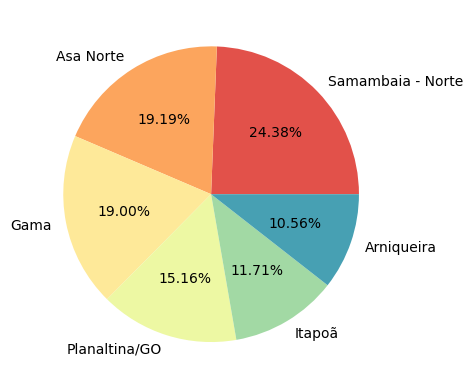

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.pie(unit_count, labels=unit_count.index,
        colors=sns.color_palette("Spectral",n_colors=6),
        autopct='%1.2f%%')

## Coluna adicional, agrupamento por idade

In [9]:
age_group = []
for i in list(world_gym["age"]):
    if i < 18:
        age_group.append("Adolescente")
    elif i >= 18 and i <= 30:
        age_group.append("Jovem Adulto")
    elif i > 30 and i <= 60:
        age_group.append("Adulto")
    elif i > 60:
        age_group.append("Idoso")

world_gym["age_group"] = age_group
world_gym.head()

,unit,age,gender,RA,time_of_day,days_per_week,time_spent,objectives,activities,age_group
0,Gama,40,Homem,Planaltina/GO,Noite,6,80,Motivos Estéticos,"Musculação, Cardio",Adulto
1,Asa Norte,44,Homem,Plano Piloto - Asa Norte,Manhã,5,50,"Motivos Estéticos, Saúde","Musculação, Cardio",Adulto
2,Asa Norte,27,Homem,Plano Piloto - Asa Norte,Noite,5,90,"Motivos Estéticos, Saúde",Musculação,Jovem Adulto
3,Itapoã,28,Homem,Paranoá,Manhã,6,40,"Motivos Estéticos, Saúde","Musculação, Lutas",Jovem Adulto
4,Asa Norte,36,Homem,Plano Piloto - Asa Sul,Noite,3,40,Motivos Sociais,Musculação,Adulto


## Colunas adicionais de horário do dia preferido para malhar de cada pessoa:

In [10]:
morning = []
for i in list(world_gym["time_of_day"]):
    if "Manhã" in i:
        morning.append(True)
    else:
        morning.append(False)
world_gym["Manhã"] = morning

afternoon = []
for i in list(world_gym["time_of_day"]):
    if "Tarde" in i:
        afternoon.append(True)
    else:
        afternoon.append(False)
world_gym["Tarde"] = afternoon

night = []
for i in list(world_gym["time_of_day"]):
    if "Noite" in i:
        night.append(True)
    else:
        night.append(False)
world_gym["Noite"] = night

world_gym.head()

,unit,age,gender,RA,time_of_day,days_per_week,time_spent,objectives,activities,age_group,Manhã,Tarde,Noite
0,Gama,40,Homem,Planaltina/GO,Noite,6,80,Motivos Estéticos,"Musculação, Cardio",Adulto,False,False,True
1,Asa Norte,44,Homem,Plano Piloto - Asa Norte,Manhã,5,50,"Motivos Estéticos, Saúde","Musculação, Cardio",Adulto,True,False,False
2,Asa Norte,27,Homem,Plano Piloto - Asa Norte,Noite,5,90,"Motivos Estéticos, Saúde",Musculação,Jovem Adulto,False,False,True
3,Itapoã,28,Homem,Paranoá,Manhã,6,40,"Motivos Estéticos, Saúde","Musculação, Lutas",Jovem Adulto,True,False,False
4,Asa Norte,36,Homem,Plano Piloto - Asa Sul,Noite,3,40,Motivos Sociais,Musculação,Adulto,False,False,True


## Objetivos dos alunos:

In [11]:
aesthetic = []
for i in list(world_gym["objectives"]):
    if "Motivos Estéticos" in i:
        aesthetic.append(True)
    else:
        aesthetic.append(False)
world_gym["Motivos Estéticos"] = aesthetic

social = []
for i in list(world_gym["objectives"]):
    if "Motivos Sociais" in i:
        social.append(True)
    else:
        social.append(False)
world_gym["Motivos Sociais"] = social

health = []
for i in list(world_gym["objectives"]):
    if "Saúde" in i:
        health.append(True)
    else:
        health.append(False)
world_gym["Saúde"] = health

world_gym.head()

,unit,age,gender,RA,time_of_day,days_per_week,time_spent,objectives,activities,age_group,Manhã,Tarde,Noite,Motivos Estéticos,Motivos Sociais,Saúde
0,Gama,40,Homem,Planaltina/GO,Noite,6,80,Motivos Estéticos,"Musculação, Cardio",Adulto,False,False,True,True,False,False
1,Asa Norte,44,Homem,Plano Piloto - Asa Norte,Manhã,5,50,"Motivos Estéticos, Saúde","Musculação, Cardio",Adulto,True,False,False,True,False,True
2,Asa Norte,27,Homem,Plano Piloto - Asa Norte,Noite,5,90,"Motivos Estéticos, Saúde",Musculação,Jovem Adulto,False,False,True,True,False,True
3,Itapoã,28,Homem,Paranoá,Manhã,6,40,"Motivos Estéticos, Saúde","Musculação, Lutas",Jovem Adulto,True,False,False,True,False,True
4,Asa Norte,36,Homem,Plano Piloto - Asa Sul,Noite,3,40,Motivos Sociais,Musculação,Adulto,False,False,True,False,True,False


## Matriz de Correlação

<Axes: >

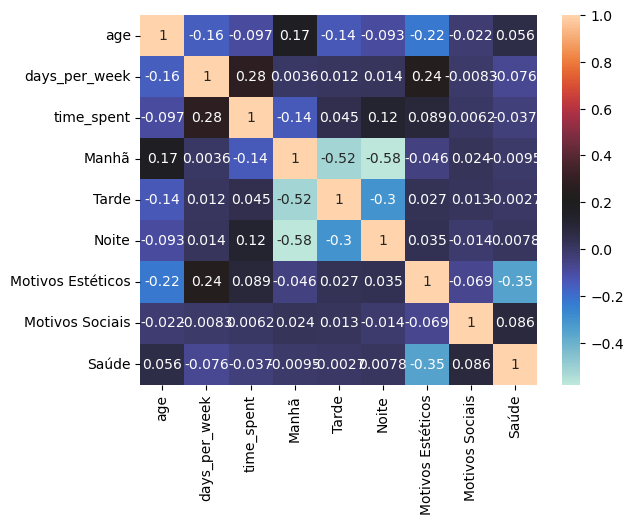

In [12]:
corr_matrix = world_gym.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True,
            cmap=sns.color_palette("icefire", as_cmap=True))

## Colunas adicionais sobre gênero dos alunos:

In [13]:
men = []
women = []
for i in list(world_gym["gender"]):
    if "Homem" in i:
        men.append(True)
        women.append(False)
    else:
        men.append(False)
        women.append(True)
world_gym["Homem"] = men
world_gym["Mulher"] = women

world_gym.head()

,unit,age,gender,RA,time_of_day,days_per_week,time_spent,objectives,activities,age_group,Manhã,Tarde,Noite,Motivos Estéticos,Motivos Sociais,Saúde,Homem,Mulher
0,Gama,40,Homem,Planaltina/GO,Noite,6,80,Motivos Estéticos,"Musculação, Cardio",Adulto,False,False,True,True,False,False,True,False
1,Asa Norte,44,Homem,Plano Piloto - Asa Norte,Manhã,5,50,"Motivos Estéticos, Saúde","Musculação, Cardio",Adulto,True,False,False,True,False,True,True,False
2,Asa Norte,27,Homem,Plano Piloto - Asa Norte,Noite,5,90,"Motivos Estéticos, Saúde",Musculação,Jovem Adulto,False,False,True,True,False,True,True,False
3,Itapoã,28,Homem,Paranoá,Manhã,6,40,"Motivos Estéticos, Saúde","Musculação, Lutas",Jovem Adulto,True,False,False,True,False,True,True,False
4,Asa Norte,36,Homem,Plano Piloto - Asa Sul,Noite,3,40,Motivos Sociais,Musculação,Adulto,False,False,True,False,True,False,True,False


## Colunas adicionais por faixa etária

In [14]:
teens = []
yas = []
adults = []
seniors = []

for i in list(world_gym["age_group"]):
    if i == "Adolescente":
        teens.append(True)
        yas.append(False)
        adults.append(False)
        seniors.append(False)
    elif i == "Jovem Adulto":
        teens.append(False)
        yas.append(True)
        adults.append(False)
        seniors.append(False)
    elif i == "Adulto":
        teens.append(False)
        yas.append(False)
        adults.append(True)
        seniors.append(False)
    elif i == "Idoso":
        teens.append(False)
        yas.append(False)
        adults.append(False)
        seniors.append(True)

world_gym["Adolescente"] = teens
world_gym["Jovem Adulto"] = yas
world_gym["Adulto"] = adults
world_gym["Idoso"] = seniors

world_gym.head(10)

,unit,age,gender,RA,time_of_day,days_per_week,time_spent,objectives,activities,age_group,...,Noite,Motivos Estéticos,Motivos Sociais,Saúde,Homem,Mulher,Adolescente,Jovem Adulto,Adulto,Idoso
0,Gama,40,Homem,Planaltina/GO,Noite,6,80,Motivos Estéticos,"Musculação, Cardio",Adulto,...,True,True,False,False,True,False,False,False,True,False
1,Asa Norte,44,Homem,Plano Piloto - Asa Norte,Manhã,5,50,"Motivos Estéticos, Saúde","Musculação, Cardio",Adulto,...,False,True,False,True,True,False,False,False,True,False
2,Asa Norte,27,Homem,Plano Piloto - Asa Norte,Noite,5,90,"Motivos Estéticos, Saúde",Musculação,Jovem Adulto,...,True,True,False,True,True,False,False,True,False,False
3,Itapoã,28,Homem,Paranoá,Manhã,6,40,"Motivos Estéticos, Saúde","Musculação, Lutas",Jovem Adulto,...,False,True,False,True,True,False,False,True,False,False
4,Asa Norte,36,Homem,Plano Piloto - Asa Sul,Noite,3,40,Motivos Sociais,Musculação,Adulto,...,True,False,True,False,True,False,False,False,True,False
5,Gama,31,Homem,Gama,Manhã,5,75,Motivos Estéticos,"Musculação, Cardio",Adulto,...,False,True,False,False,True,False,False,False,True,False
6,Asa Norte,39,Mulher,Plano Piloto - Asa Norte,Manhã,5,45,"Motivos Estéticos, Saúde","Musculação, Cardio",Adulto,...,False,True,False,True,False,True,False,False,True,False
7,Gama,42,Homem,Gama,Tarde,3,90,Motivos Estéticos,Musculação,Adulto,...,False,True,False,False,True,False,False,False,True,False
8,Itapoã,38,Homem,Itapoã,Manhã,5,50,Motivos Estéticos,"Musculação, Cardio",Adulto,...,False,True,False,False,True,False,False,False,True,False
9,Itapoã,30,Mulher,Itapoã,Manhã,3,50,Saúde,Musculação,Jovem Adulto,...,False,False,False,True,False,True,False,True,False,False


# Preparação dos dados para análise de afinidade

In [15]:
bool_world_gym = world_gym.iloc[:, range(10,22)]
bool_world_gym.head()

,Manhã,Tarde,Noite,Motivos Estéticos,Motivos Sociais,Saúde,Homem,Mulher,Adolescente,Jovem Adulto,Adulto,Idoso
0,False,False,True,True,False,False,True,False,False,False,True,False
1,True,False,False,True,False,True,True,False,False,False,True,False
2,False,False,True,True,False,True,True,False,False,True,False,False
3,True,False,False,True,False,True,True,False,False,True,False,False
4,False,False,True,False,True,False,True,False,False,False,True,False


## Suportes de cada subconjunto, mínimo de 25%

In [16]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

freq_items = apriori(bool_world_gym, min_support=0.25, use_colnames=True)
freq_items

,support,itemsets
0,0.527831,(Manhã)
1,0.278311,(Noite)
2,0.827255,(Motivos Estéticos)
3,0.600768,(Saúde)
4,0.458733,(Homem)
5,0.541267,(Mulher)
6,0.312860,(Jovem Adulto)
7,0.633397,(Adulto)
8,0.428023,"(Manhã, Motivos Estéticos)"
9,0.314779,"(Manhã, Saúde)"


## Regras de associação, confiança mínima de 50%

In [17]:
associations = association_rules(freq_items, metric="confidence",
                                 min_threshold=0.5)
associations

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Manhã),(Motivos Estéticos),0.527831,0.827255,0.428023,0.810909,0.980240,-0.008628,0.913554,-0.040944
1,(Motivos Estéticos),(Manhã),0.827255,0.527831,0.428023,0.517401,0.980240,-0.008628,0.978388,-0.104498
2,(Manhã),(Saúde),0.527831,0.600768,0.314779,0.596364,0.992669,-0.002325,0.989089,-0.015400
3,(Saúde),(Manhã),0.600768,0.527831,0.314779,0.523962,0.992669,-0.002325,0.991872,-0.018162
4,(Manhã),(Mulher),0.527831,0.541267,0.303263,0.574545,1.061483,0.017566,1.078219,0.122672
5,(Mulher),(Manhã),0.541267,0.527831,0.303263,0.560284,1.061483,0.017566,1.073803,0.126264
6,(Manhã),(Adulto),0.527831,0.633397,0.353167,0.669091,1.056353,0.018840,1.107865,0.112982
7,(Adulto),(Manhã),0.633397,0.527831,0.353167,0.557576,1.056353,0.018840,1.067231,0.145516
8,(Saúde),(Motivos Estéticos),0.600768,0.827255,0.431862,0.718850,0.868958,-0.065126,0.614422,-0.274171
9,(Motivos Estéticos),(Saúde),0.827255,0.600768,0.431862,0.522042,0.868958,-0.065126,0.835287,-0.466094


### Colocando em ordem descrescente de confiança

In [18]:
associations = associations.sort_values(by="confidence", ignore_index=True,
                                        ascending=False)
associations

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Jovem Adulto),(Motivos Estéticos),0.312860,0.827255,0.274472,0.877301,1.060496,0.015657,1.407869,0.083018
1,"(Adulto, Mulher)",(Motivos Estéticos),0.328215,0.827255,0.276392,0.842105,1.017951,0.004874,1.094050,0.026250
2,"(Manhã, Mulher)",(Motivos Estéticos),0.303263,0.827255,0.255278,0.841772,1.017548,0.004402,1.091747,0.024752
3,(Mulher),(Motivos Estéticos),0.541267,0.827255,0.454894,0.840426,1.015920,0.007129,1.082534,0.034161
4,(Adulto),(Motivos Estéticos),0.633397,0.827255,0.522073,0.824242,0.996358,-0.001908,0.982858,-0.009872
5,(Homem),(Motivos Estéticos),0.458733,0.827255,0.372361,0.811715,0.981215,-0.007129,0.917466,-0.034161
6,(Manhã),(Motivos Estéticos),0.527831,0.827255,0.428023,0.810909,0.980240,-0.008628,0.913554,-0.040944
7,"(Manhã, Adulto)",(Motivos Estéticos),0.353167,0.827255,0.285988,0.809783,0.978879,-0.006171,0.908144,-0.032281
8,(Saúde),(Motivos Estéticos),0.600768,0.827255,0.431862,0.718850,0.868958,-0.065126,0.614422,-0.274171
9,"(Adulto, Saúde)",(Motivos Estéticos),0.362764,0.827255,0.255278,0.703704,0.850649,-0.044820,0.583013,-0.216008


### Eliminando colunas desnecessárias

In [19]:
associations = associations.drop(columns=["lift","leverage","conviction",
                                          "zhangs_metric"], axis=1)
associations

,antecedents,consequents,antecedent support,consequent support,support,confidence
0,(Jovem Adulto),(Motivos Estéticos),0.312860,0.827255,0.274472,0.877301
1,"(Adulto, Mulher)",(Motivos Estéticos),0.328215,0.827255,0.276392,0.842105
2,"(Manhã, Mulher)",(Motivos Estéticos),0.303263,0.827255,0.255278,0.841772
3,(Mulher),(Motivos Estéticos),0.541267,0.827255,0.454894,0.840426
4,(Adulto),(Motivos Estéticos),0.633397,0.827255,0.522073,0.824242
5,(Homem),(Motivos Estéticos),0.458733,0.827255,0.372361,0.811715
6,(Manhã),(Motivos Estéticos),0.527831,0.827255,0.428023,0.810909
7,"(Manhã, Adulto)",(Motivos Estéticos),0.353167,0.827255,0.285988,0.809783
8,(Saúde),(Motivos Estéticos),0.600768,0.827255,0.431862,0.718850
9,"(Adulto, Saúde)",(Motivos Estéticos),0.362764,0.827255,0.255278,0.703704


## Preparando os dados para visualização

In [20]:
graphing_dict = {"col1":["Jovem Adulto/Motivos Estéticos",
                         "Mulher, Adulto/Motivos Estéticos",
                         "Mulher, Manhã/Motivos Estéticos",
                         "Mulher/Motivos Estéticos",
                         "Adulto/Motivos Estéticos",
                         "Homem/Motivos Estéticos",
                         "Manhã/Motivos Estéticos",
                         "Manhã, Adulto/Motivos Estéticos",
                         "Saúde/Motivos Estéticos",
                         "Adulto, Saúde/Motivos Estéticos",
                         "Manhã/Adulto",
                         "Motivos Estéticos, Manhã/Adulto",
                         "Homem/Adulto",
                         "Motivos Estéticos/Adulto",
                         "Motivos Estéticos, Mulher/Adulto",
                         "Mulher/Adulto","Mulher/Saúde",
                         "Saúde/Adulto",
                         "Motivos Estéticos, Manhã/Mulher",
                         "Manhã/Saúde"],
                 "col2":[0.8773*100,0.8421*100,0.8418*100,0.8404*100,0.8242*100,
                         0.8117*100,0.8109*100,0.8098*100,0.7188*100,0.7037*100,
                         0.6691*100,0.6682*100,0.6653*100,0.6311*100,0.6076*100,
                         0.6064*100,0.6064*100,0.6038*100,0.5964*100,0.5963*100]}
graphing_dict

{'col1': ['Jovem Adulto/Motivos Estéticos',
  'Mulher, Adulto/Motivos Estéticos',
  'Mulher, Manhã/Motivos Estéticos',
  'Mulher/Motivos Estéticos',
  'Adulto/Motivos Estéticos',
  'Homem/Motivos Estéticos',
  'Manhã/Motivos Estéticos',
  'Manhã, Adulto/Motivos Estéticos',
  'Saúde/Motivos Estéticos',
  'Adulto, Saúde/Motivos Estéticos',
  'Manhã/Adulto',
  'Motivos Estéticos, Manhã/Adulto',
  'Homem/Adulto',
  'Motivos Estéticos/Adulto',
  'Motivos Estéticos, Mulher/Adulto',
  'Mulher/Adulto',
  'Mulher/Saúde',
  'Saúde/Adulto',
  'Motivos Estéticos, Manhã/Mulher',
  'Manhã/Saúde'],
 'col2': [87.72999999999999,
  84.21,
  84.17999999999999,
  84.04,
  82.42,
  81.17,
  81.08999999999999,
  80.97999999999999,
  71.88,
  70.37,
  66.91,
  66.82000000000001,
  66.53,
  63.11,
  60.760000000000005,
  60.64000000000001,
  60.64000000000001,
  60.38,
  59.64,
  59.63]}

In [21]:
graphing_prep = pd.DataFrame(graphing_dict)
graphing_prep

,col1,col2
0,Jovem Adulto/Motivos Estéticos,87.73
1,"Mulher, Adulto/Motivos Estéticos",84.21
2,"Mulher, Manhã/Motivos Estéticos",84.18
3,Mulher/Motivos Estéticos,84.04
4,Adulto/Motivos Estéticos,82.42
5,Homem/Motivos Estéticos,81.17
6,Manhã/Motivos Estéticos,81.09
7,"Manhã, Adulto/Motivos Estéticos",80.98
8,Saúde/Motivos Estéticos,71.88
9,"Adulto, Saúde/Motivos Estéticos",70.37


# Visualização dos 20 primeiros itens das regras de associação

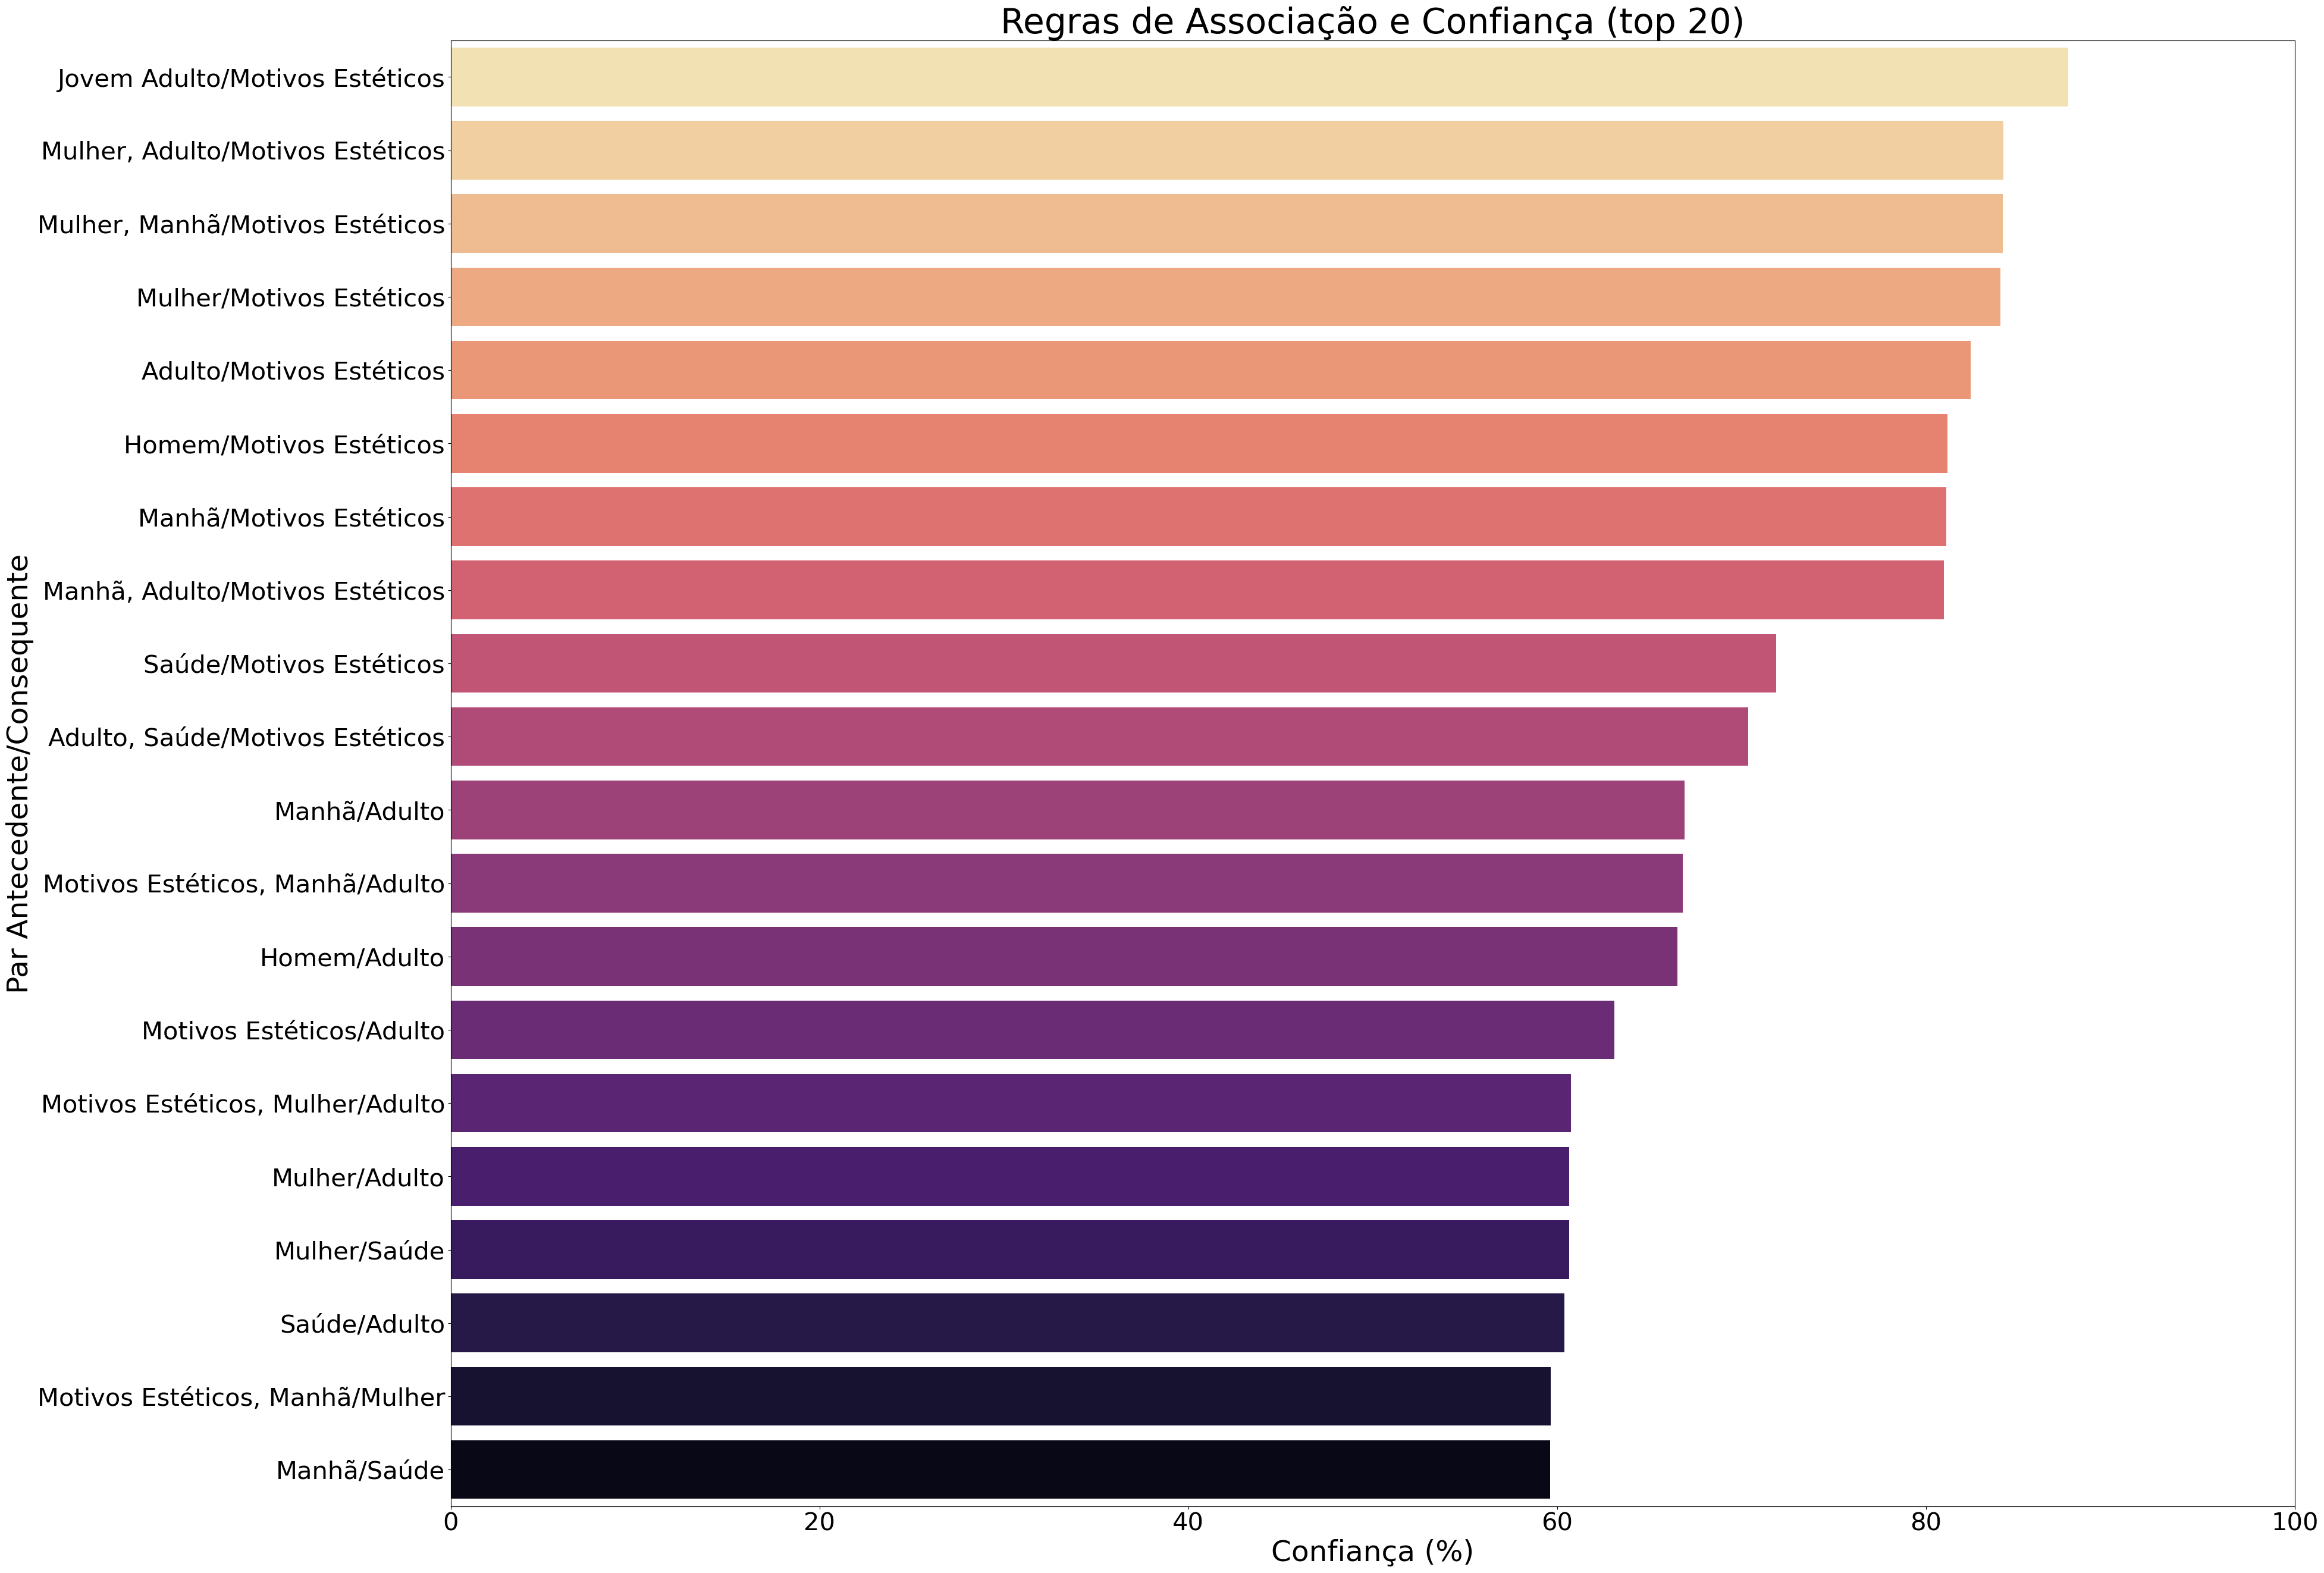

In [22]:
plt.figure(figsize=(40,32))
ax = sns.barplot(data=graphing_prep,x="col2",y="col1",palette="magma_r")
ax.axes.set_title("Regras de Associação e Confiança (top 20)",fontsize=42) # title
ax.set_xlabel("Confiança (%)",fontsize=35) # x axis label
ax.set_ylabel("Par Antecedente/Consequente",fontsize=35) # y axis label
ax.tick_params(labelsize=30)
ax.set_xlim(left=0.0,right=100.0)
plt.show()